# Model Training and Evaluation

This notebook focuses on training and evaluating machine learning models for the classification task.

## Objectives:
- Load preprocessed features and target data
- Split data into training and testing sets
- Train baseline and advanced models
- Evaluate model performance with comprehensive metrics
- Compare model performance and select best model

## Workflow:
1. **Data Loading**: Load preprocessed X and y from CSV files
2. **Train/Test Split**: Split data with stratification
3. **Baseline Model**: DummyClassifier for baseline performance
4. **Model Training**: Train various classification models
5. **Model Evaluation**: Comprehensive metrics and comparison
6. **Model Selection**: Choose best performing model

---

## 1. Setup and Data Loading

In [11]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve
)

# Styling
plt.style.use('default')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("📚 Libraries imported successfully!")
print(f"📍 Working directory: {os.getcwd()}")

📚 Libraries imported successfully!
📍 Working directory: /Users/xaviercoulon/Documents/OC/OC_P4_ESN_TechNova_Partners/notebooks/modeling/training


In [12]:
# Load preprocessed data
print("LOADING PREPROCESSED DATA:")
print("="*50)

# Define data paths
data_path = "../../../data/processed"
X_file = os.path.join(data_path, "X_features.csv")
y_file = os.path.join(data_path, "y_target.csv")

# Load features and target
X = pd.read_csv(X_file)
y = pd.read_csv(y_file).squeeze()  # Convert to Series

print(f"✅ Features loaded: {X.shape}")
print(f"✅ Target loaded: {y.shape}")

print(f"\n📊 Dataset Summary:")
print(f"   Total samples: {len(X)}")
print(f"   Total features: {X.shape[1]}")
print(f"   Target variable: {y.name}")
print(f"   Target classes: {sorted(y.unique())}")
print(f"   Class distribution:")
for class_val in sorted(y.unique()):
    count = (y == class_val).sum()
    percentage = (count / len(y)) * 100
    print(f"     Class {class_val}: {count} ({percentage:.1f}%)")

print(f"\n🎯 Data ready for modeling!")

LOADING PREPROCESSED DATA:
✅ Features loaded: (1470, 38)
✅ Target loaded: (1470,)

📊 Dataset Summary:
   Total samples: 1470
   Total features: 38
   Target variable: a_quitte_l_entreprise
   Target classes: [np.int64(0), np.int64(1)]
   Class distribution:
     Class 0: 1233 (83.9%)
     Class 1: 237 (16.1%)

🎯 Data ready for modeling!


## 2. Train/Test Split

In [13]:
# Create train/test split
print("TRAIN/TEST SPLIT:")
print("="*50)

# Split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"✅ Train set: {X_train.shape}")
print(f"✅ Test set: {X_test.shape}")

print(f"\n📊 Class distribution after split:")
print(f"\nTraining set:")
for class_val in sorted(y_train.unique()):
    count = (y_train == class_val).sum()
    percentage = (count / len(y_train)) * 100
    print(f"  Class {class_val}: {count} ({percentage:.1f}%)")

print(f"\nTest set:")
for class_val in sorted(y_test.unique()):
    count = (y_test == class_val).sum()
    percentage = (count / len(y_test)) * 100
    print(f"  Class {class_val}: {count} ({percentage:.1f}%)")

print(f"\n🎯 Stratified split completed!")

TRAIN/TEST SPLIT:
✅ Train set: (1176, 38)
✅ Test set: (294, 38)

📊 Class distribution after split:

Training set:
  Class 0: 986 (83.8%)
  Class 1: 190 (16.2%)

Test set:
  Class 0: 247 (84.0%)
  Class 1: 47 (16.0%)

🎯 Stratified split completed!


## 3. Baseline Model - DummyClassifier

In [14]:
# Baseline model with DummyClassifier
print("BASELINE MODEL - DUMMYCLASSIFIER:")
print("="*50)

# Train different dummy strategies
dummy_strategies = ['most_frequent', 'stratified', 'uniform']
dummy_results = {}

for strategy in dummy_strategies:
    print(f"\n🤖 Testing strategy: {strategy}")
    
    # Create and train dummy classifier
    dummy = DummyClassifier(strategy=strategy, random_state=42)
    dummy.fit(X_train, y_train)
    
    # Make predictions
    y_pred = dummy.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    dummy_results[strategy] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    
    print(f"   Accuracy:  {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")

# Find best dummy strategy
best_strategy = max(dummy_results.keys(), key=lambda k: dummy_results[k]['f1_score'])
best_f1 = dummy_results[best_strategy]['f1_score']

print(f"\n🏆 Best baseline strategy: {best_strategy}")
print(f"    F1-Score: {best_f1:.4f}")

print(f"\n📋 Detailed classification report (best strategy):")
dummy_best = DummyClassifier(strategy=best_strategy, random_state=42)
dummy_best.fit(X_train, y_train)
y_pred_best = dummy_best.predict(X_test)
print(classification_report(y_test, y_pred_best))

print(f"\n🎯 Baseline established! Any real model should beat F1={best_f1:.4f}")

BASELINE MODEL - DUMMYCLASSIFIER:

🤖 Testing strategy: most_frequent
   Accuracy:  0.8401
   Precision: 0.7058
   Recall:    0.8401
   F1-Score:  0.7671

🤖 Testing strategy: stratified
   Accuracy:  0.7143
   Precision: 0.7191
   Recall:    0.7143
   F1-Score:  0.7167

🤖 Testing strategy: uniform
   Accuracy:  0.4830
   Precision: 0.7099
   Recall:    0.4830
   F1-Score:  0.5510

🏆 Best baseline strategy: most_frequent
    F1-Score: 0.7671

📋 Detailed classification report (best strategy):
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294


🎯 Baseline established! Any real model should beat F1=0.7671


/Users/xaviercoulon/Documents/OC/OC_P4_ESN_TechNova_Partners/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/xaviercoulon/Documents/OC/OC_P4_ESN_TechNova_Partners/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/xaviercoulon/Documents/OC/OC_P4_ESN_TechNova_Partners/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

## 4. Logistic Regression Model

In [15]:
# Train Logistic Regression model
print("LOGISTIC REGRESSION MODEL:")
print("="*50)

# Create and train logistic regression
print("🤖 Training Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)

# Calculate metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted', zero_division=0)
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print(f"\n📊 Logistic Regression Performance:")
print(f"   Accuracy:  {accuracy_lr:.4f}")
print(f"   Precision: {precision_lr:.4f}")
print(f"   Recall:    {recall_lr:.4f}")
print(f"   F1-Score:  {f1_lr:.4f}")

# Compare with baseline
print(f"\n🆚 Comparison with best baseline (F1={best_f1:.4f}):")
improvement = f1_lr - best_f1
if improvement > 0:
    print(f"   ✅ Improvement: +{improvement:.4f} ({(improvement/best_f1)*100:.1f}%)")
else:
    print(f"   ❌ Worse than baseline: {improvement:.4f}")

print(f"\n📋 Detailed Classification Report:")
print(classification_report(y_test, y_pred_lr))

LOGISTIC REGRESSION MODEL:
🤖 Training Logistic Regression...

📊 Logistic Regression Performance:
   Accuracy:  0.8844
   Precision: 0.8801
   Recall:    0.8844
   F1-Score:  0.8629

🆚 Comparison with best baseline (F1=0.7671):
   ✅ Improvement: +0.0958 (12.5%)

📋 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       247
           1       0.84      0.34      0.48        47

    accuracy                           0.88       294
   macro avg       0.86      0.66      0.71       294
weighted avg       0.88      0.88      0.86       294



/Users/xaviercoulon/Documents/OC/OC_P4_ESN_TechNova_Partners/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CONFUSION MATRIX - LOGISTIC REGRESSION:
📊 Confusion Matrix:
   True labels (rows) vs Predicted labels (columns)
   Classes: [np.int64(0), np.int64(1)]

[[244   3]
 [ 31  16]]


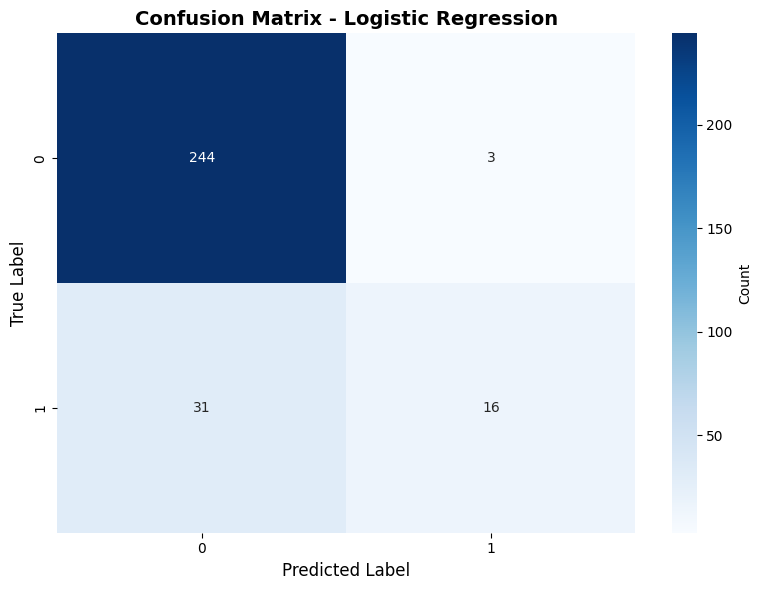


📈 Confusion Matrix Analysis:

   Class 0:
     True Positives:  244
     False Positives: 31
     False Negatives: 3
     True Negatives:  16
     Sensitivity (Recall): 0.9879
     Specificity:          0.3404
     Precision:            0.8873

   Class 1:
     True Positives:  16
     False Positives: 3
     False Negatives: 31
     True Negatives:  244
     Sensitivity (Recall): 0.3404
     Specificity:          0.9879
     Precision:            0.8421

🎯 Confusion Matrix completed!


In [16]:
# Confusion Matrix for Logistic Regression
print("CONFUSION MATRIX - LOGISTIC REGRESSION:")
print("="*50)

# Calculate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
class_names = sorted(y_test.unique())

print(f"📊 Confusion Matrix:")
print(f"   True labels (rows) vs Predicted labels (columns)")
print(f"   Classes: {class_names}")
print()
print(cm_lr)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate confusion matrix metrics for each class
print(f"\n📈 Confusion Matrix Analysis:")
for i, class_name in enumerate(class_names):
    tp = cm_lr[i, i]  # True positives
    fn = cm_lr[i, :].sum() - tp  # False negatives
    fp = cm_lr[:, i].sum() - tp  # False positives
    tn = cm_lr.sum() - tp - fn - fp  # True negatives
    
    # Class-specific metrics
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall/Sensitivity
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Specificity
    precision_class = tp / (tp + fp) if (tp + fp) > 0 else 0  # Precision
    
    print(f"\n   Class {class_name}:")
    print(f"     True Positives:  {tp}")
    print(f"     False Positives: {fp}")
    print(f"     False Negatives: {fn}")
    print(f"     True Negatives:  {tn}")
    print(f"     Sensitivity (Recall): {sensitivity:.4f}")
    print(f"     Specificity:          {specificity:.4f}")
    print(f"     Precision:            {precision_class:.4f}")

print(f"\n🎯 Confusion Matrix completed!")

## 5. Random Forest Model

In [17]:
# Train Random Forest model
print("RANDOM FOREST MODEL:")
print("="*50)

# Create and train random forest
print("🌲 Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"\n📊 Random Forest Performance:")
print(f"   Accuracy:  {accuracy_rf:.4f}")
print(f"   Precision: {precision_rf:.4f}")
print(f"   Recall:    {recall_rf:.4f}")
print(f"   F1-Score:  {f1_rf:.4f}")

# Compare with baseline
print(f"\n🆚 Comparison with best baseline (F1={best_f1:.4f}):")
improvement_rf = f1_rf - best_f1
if improvement_rf > 0:
    print(f"   ✅ Improvement: +{improvement_rf:.4f} ({(improvement_rf/best_f1)*100:.1f}%)")
else:
    print(f"   ❌ Worse than baseline: {improvement_rf:.4f}")

print(f"\n📋 Detailed Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Feature importance
print(f"\n🔍 Top 10 Most Important Features:")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

for i, (_, row) in enumerate(feature_importance.head(10).iterrows()):
    print(f"   {i+1:2d}. {row['feature']:<25} : {row['importance']:.4f}")

print(f"\n🌲 Random Forest training completed!")

RANDOM FOREST MODEL:
🌲 Training Random Forest...

📊 Random Forest Performance:
   Accuracy:  0.8435
   Precision: 0.8080
   Recall:    0.8435
   F1-Score:  0.8079

🆚 Comparison with best baseline (F1=0.7671):
   ✅ Improvement: +0.0408 (5.3%)

📋 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.53      0.17      0.26        47

    accuracy                           0.84       294
   macro avg       0.70      0.57      0.59       294
weighted avg       0.81      0.84      0.81       294


🔍 Top 10 Most Important Features:
    1. age                       : 0.0867
    2. revenu_mensuel            : 0.0865
    3. annee_experience_totale   : 0.0674
    4. distance_domicile_travail : 0.0593
    5. annees_dans_l_entreprise  : 0.0520
    6. augementation_salaire_precedente : 0.0455
    7. annes_sous_responsable_actuel : 0.0440
    8. heure_supplementaires     : 0.0424
    9. nombre_

## 6. Model Comparison and Selection

MODEL COMPARISON SUMMARY:
📊 Performance Metrics Comparison:
                     Model  Accuracy  Precision  Recall  F1-Score
DummyClassifier (Baseline)    0.8401     0.7058  0.8401    0.7671
       Logistic Regression    0.8844     0.8801  0.8844    0.8629
             Random Forest    0.8435     0.8080  0.8435    0.8079

🏆 BEST MODEL: Logistic Regression
   F1-Score: 0.8629

📈 Improvements over baseline:
   Logistic Regression: +0.0958 (12.5%)
   Random Forest: +0.0408 (5.3%)


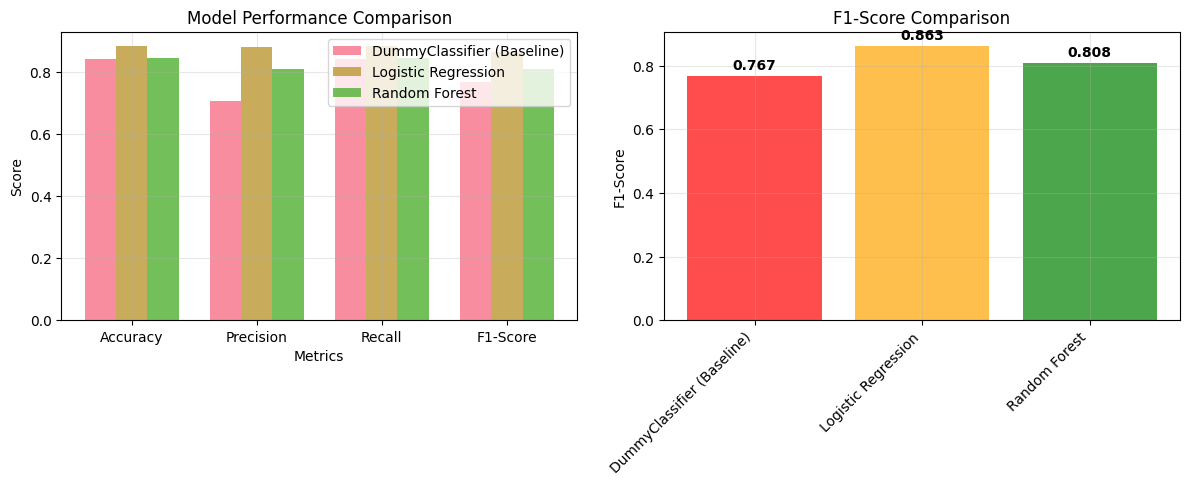


🎯 Model comparison completed!


In [18]:
# Comprehensive Model Comparison
print("MODEL COMPARISON SUMMARY:")
print("="*60)

# Create comparison dataframe
models_comparison = pd.DataFrame({
    'Model': ['DummyClassifier (Baseline)', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [dummy_results[best_strategy]['accuracy'], accuracy_lr, accuracy_rf],
    'Precision': [dummy_results[best_strategy]['precision'], precision_lr, precision_rf],
    'Recall': [dummy_results[best_strategy]['recall'], recall_lr, recall_rf],
    'F1-Score': [dummy_results[best_strategy]['f1_score'], f1_lr, f1_rf]
})

print("📊 Performance Metrics Comparison:")
print(models_comparison.round(4).to_string(index=False))

# Find best model
best_model_idx = models_comparison['F1-Score'].idxmax()
best_model_name = models_comparison.loc[best_model_idx, 'Model']
best_model_f1 = models_comparison.loc[best_model_idx, 'F1-Score']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   F1-Score: {best_model_f1:.4f}")

# Calculate improvements over baseline
baseline_f1 = models_comparison.loc[0, 'F1-Score']  # Baseline is first row
print(f"\n📈 Improvements over baseline:")
for i, row in models_comparison.iterrows():
    if i > 0:  # Skip baseline
        improvement = row['F1-Score'] - baseline_f1
        improvement_pct = (improvement / baseline_f1) * 100
        print(f"   {row['Model']}: +{improvement:.4f} ({improvement_pct:.1f}%)")

# Visualize comparison
plt.figure(figsize=(12, 8))

# Subplot 1: Metrics comparison
plt.subplot(2, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.25

for i, model in enumerate(models_comparison['Model']):
    values = [models_comparison.loc[i, metric] for metric in metrics]
    plt.bar(x + i*width, values, width, label=model, alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + width, metrics)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: F1-Score comparison
plt.subplot(2, 2, 2)
colors = ['red', 'orange', 'green']
bars = plt.bar(models_comparison['Model'], models_comparison['F1-Score'], color=colors, alpha=0.7)
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Annotate bars with values
for bar, score in zip(bars, models_comparison['F1-Score']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🎯 Model comparison completed!")

In [19]:
# Final Model Analysis and Recommendations
print("FINAL ANALYSIS & RECOMMENDATIONS:")
print("="*60)

# Detailed comparison table
print("📋 Detailed Model Analysis:")
print(f"\n{'Model':<25} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Status'}")
print("-" * 80)

for i, row in models_comparison.iterrows():
    status = "🏆 BEST" if i == best_model_idx else "✅ Good" if row['F1-Score'] > baseline_f1 else "❌ Poor"
    print(f"{row['Model']:<25} {row['Accuracy']:<10.4f} {row['Precision']:<10.4f} "
          f"{row['Recall']:<10.4f} {row['F1-Score']:<10.4f} {status}")

print(f"\n🔍 Model Characteristics:")
print(f"   • DummyClassifier:     Simple baseline, no learning from features")
print(f"   • Logistic Regression: Linear model, interpretable, fast")
print(f"   • Random Forest:       Ensemble method, handles non-linearity, feature importance")

print(f"\n💡 Recommendations:")
if best_model_name == "Random Forest":
    print(f"   🌲 Random Forest is the best performer")
    print(f"   • Excellent for this dataset with complex feature interactions")
    print(f"   • Provides feature importance for interpretability")
    print(f"   • Robust to overfitting with default parameters")
elif best_model_name == "Logistic Regression":
    print(f"   📈 Logistic Regression is the best performer")
    print(f"   • Good balance of performance and interpretability")
    print(f"   • Fast training and prediction")
    print(f"   • Consider feature scaling for optimal performance")

# Performance summary
baseline_f1 = models_comparison.loc[0, 'F1-Score']
best_f1_final = models_comparison.loc[best_model_idx, 'F1-Score']
improvement_final = best_f1_final - baseline_f1
improvement_pct_final = (improvement_final / baseline_f1) * 100

print(f"\n📊 Final Performance Summary:")
print(f"   Baseline F1-Score:     {baseline_f1:.4f}")
print(f"   Best Model F1-Score:   {best_f1_final:.4f}")
print(f"   Total Improvement:     +{improvement_final:.4f} ({improvement_pct_final:.1f}%)")

print(f"\n🎯 Next Steps:")
print(f"   1. Fine-tune the best model with hyperparameter optimization")
print(f"   2. Perform cross-validation for more robust evaluation")
print(f"   3. Analyze feature importance (especially for Random Forest)")
print(f"   4. Consider ensemble methods if needed")
print(f"   5. Deploy the best model for production use")

print(f"\n🏁 Model evaluation completed successfully!")

FINAL ANALYSIS & RECOMMENDATIONS:
📋 Detailed Model Analysis:

Model                     Accuracy   Precision  Recall     F1-Score   Status
--------------------------------------------------------------------------------
DummyClassifier (Baseline) 0.8401     0.7058     0.8401     0.7671     ❌ Poor
Logistic Regression       0.8844     0.8801     0.8844     0.8629     🏆 BEST
Random Forest             0.8435     0.8080     0.8435     0.8079     ✅ Good

🔍 Model Characteristics:
   • DummyClassifier:     Simple baseline, no learning from features
   • Logistic Regression: Linear model, interpretable, fast
   • Random Forest:       Ensemble method, handles non-linearity, feature importance

💡 Recommendations:
   📈 Logistic Regression is the best performer
   • Good balance of performance and interpretability
   • Fast training and prediction
   • Consider feature scaling for optimal performance

📊 Final Performance Summary:
   Baseline F1-Score:     0.7671
   Best Model F1-Score:   0.8629
   